In [19]:
import torch
import copy
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from torch import nn, optim
import torch.nn.functional as F
from scipy.io import arff

In [20]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

In [3]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [4]:
#Load the arff files into Pandas data frames
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [9]:
data1 = arff.loadarff(r'C:/Users/ahjm5/Desktop/Project 3.2 TimeSeries/ECG5000_TRAIN.arff')
train = pd.DataFrame(data1[0])
train["target"] = train['target'].str.decode("utf-8")
train.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [10]:
data1 = arff.loadarff(r'C:/Users/ahjm5/Desktop/Project 3.2 TimeSeries/ECG5000_TEST.arff')
test = pd.DataFrame(data1[0])
test["target"] = test['target'].str.decode("utf-8")
test.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,0.334577,...,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073,1
1,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,-0.397999,...,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009,1
2,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,-1.440680,...,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767,1
3,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,-1.202146,...,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853,1
4,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,-0.521316,...,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784,1


In [12]:
df = pd.concat([train,test])
df = df.sample(frac=1.0)
df.shape
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
1001,1.469756,-1.048520,-3.394356,-4.254399,-4.162834,-3.822570,-3.003609,-1.799773,-1.500033,-1.025095,...,0.945178,1.275588,1.617218,1.580279,1.306195,1.351674,1.915517,1.672103,-1.039932,1
2086,-1.998602,-3.770552,-4.267091,-4.256133,-3.515288,-2.554540,-1.699639,-1.566366,-1.038815,-0.425483,...,1.008577,1.024698,1.051141,1.015352,0.988475,1.050191,1.089509,1.465382,0.799517,1
2153,-1.187772,-3.365038,-3.695653,-4.094781,-3.992549,-3.425381,-2.057643,-1.277729,-1.307397,-0.623098,...,1.085007,1.467196,1.413850,1.283822,0.923126,0.759235,0.932364,1.216265,-0.824489,1
555,0.604969,-1.671363,-3.236131,-3.966465,-4.067820,-3.551897,-2.582864,-1.804755,-1.688151,-1.025897,...,0.545222,0.649363,0.986846,1.234495,1.280039,1.215985,1.617971,2.196543,0.023843,1
205,-1.197203,-3.270123,-3.778723,-3.977574,-3.405060,-2.392634,-1.726322,-1.572748,-0.920075,-0.388731,...,0.828168,0.914338,1.063077,1.393479,1.469756,1.392281,1.144732,1.668263,1.734676,1


In [13]:
CLASS_NORMAL = 1

class_names = ['Normal','R on T','PVC','SP','UB']

In [14]:
new_columns = list(df.columns)
new_columns[-1] = 'target'
df.columns = new_columns

C:\Users\ahjm5\AppData\Local\Temp\ipykernel_18248\758769881.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names)


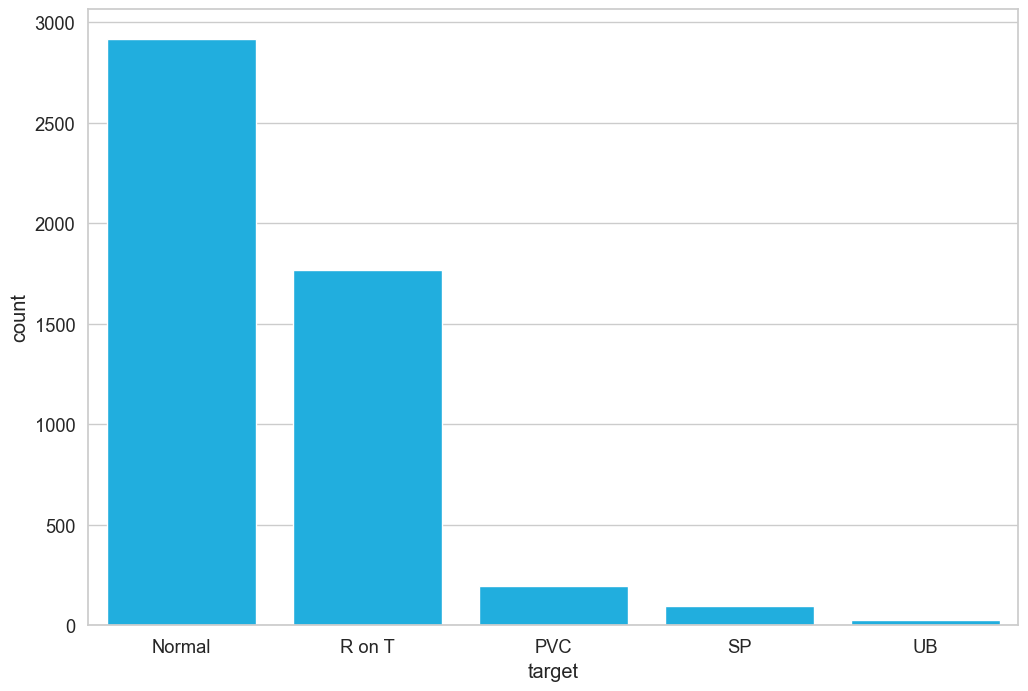

In [18]:
df.target.value_counts()
ax = sns.countplot(x="target", data=df,order = df['target'].value_counts().index)
ax.set_xticklabels(class_names)
plt.show()

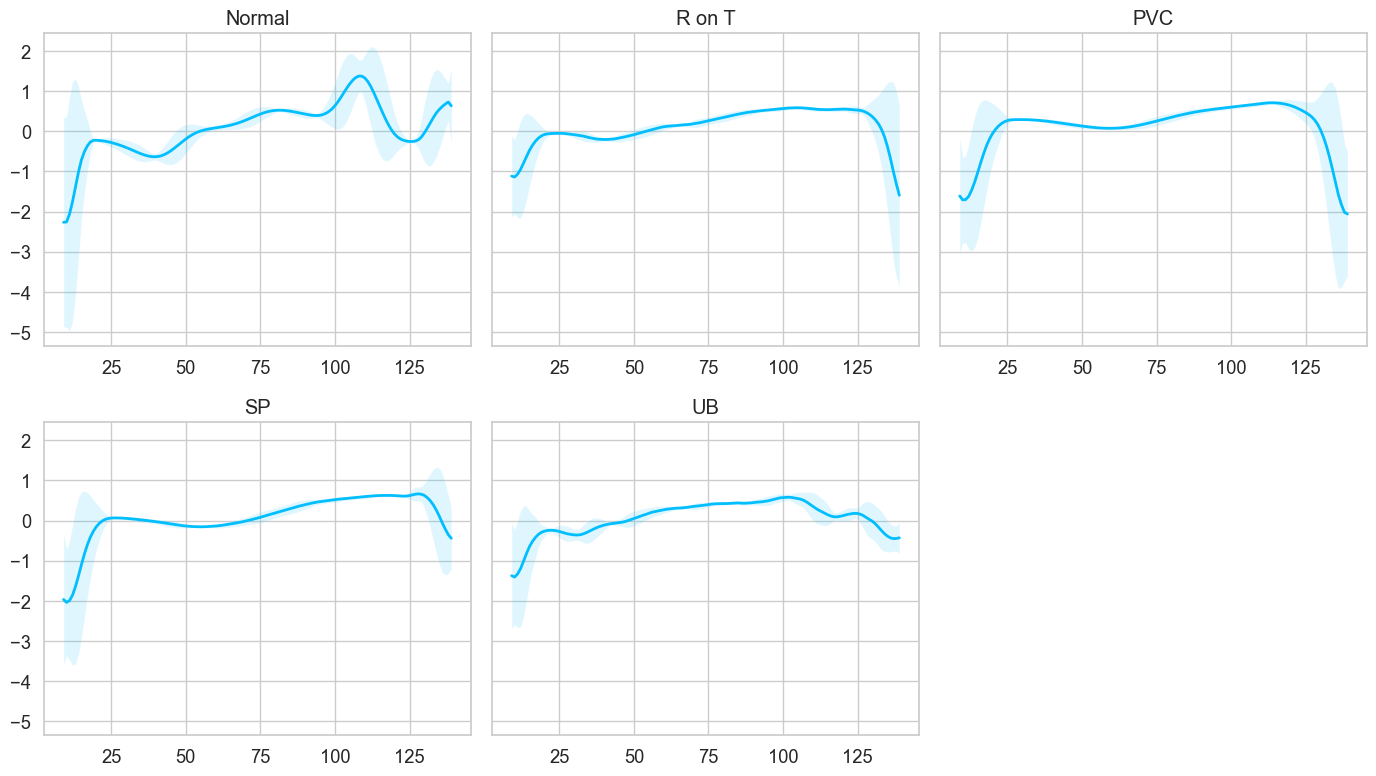

In [21]:
def plot_time_series_class(data, class_name, ax, n_steps=10):
  time_series_df = pd.DataFrame(data)

  smooth_path = time_series_df.rolling(n_steps).mean()
  path_deviation = 2 * time_series_df.rolling(n_steps).std()

  under_line = (smooth_path - path_deviation)[0]
  over_line = (smooth_path + path_deviation)[0]

  ax.plot(smooth_path, linewidth=2)
  ax.fill_between(
    path_deviation.index,
    under_line,
    over_line,
    alpha=.125
  )
  ax.set_title(class_name)

classes = df.target.unique()

fig, axs = plt.subplots(
  nrows=len(classes) // 3 + 1,
  ncols=3,
  sharey=True,
  figsize=(14, 8)
)

for i, cls in enumerate(classes):
  ax = axs.flat[i]
  data = df[df.target == cls] \
    .drop(labels='target', axis=1) \
    .mean(axis=0) \
    .to_numpy()
  plot_time_series_class(data, class_names[i], ax)

fig.delaxes(axs.flat[-1])
fig.tight_layout();

In [27]:
normal_df = df[df.target == str(CLASS_NORMAL)].drop(labels='target', axis=1)
normal_df.shape

(2919, 140)

In [28]:
anomaly_df = df[df.target != str(CLASS_NORMAL)].drop(labels='target', axis=1)
anomaly_df.shape

(2081, 140)

In [29]:
train_df, val_df = train_test_split(
  normal_df,
  test_size=0.15,
  random_state=RANDOM_SEED
)

val_df, test_df = train_test_split(
  val_df,
  test_size=0.33, 
  random_state=RANDOM_SEED
)

In [25]:
def create_dataset(df):

  sequences = df.astype(np.float32).to_numpy().tolist()

  dataset = [torch.tensor(s).unsqueeze(1).float() for s in sequences]

  n_seq, seq_len, n_features = torch.stack(dataset).shape

  return dataset, seq_len, n_features

In [26]:
train_dataset, seq_len, n_features = create_dataset(train_df)
val_dataset, _, _ = create_dataset(val_df)
test_normal_dataset, _, _ = create_dataset(test_df)
test_anomaly_dataset, _, _ = create_dataset(anomaly_df)

In [30]:
class Encoder(nn.Module):

  def __init__(self, seq_len, n_features, embedding_dim=64):
    super(Encoder, self).__init__()

    self.seq_len, self.n_features = seq_len, n_features
    #self.embedding_dim, self.hidden_dim = embedding_dim, 2 * embedding_dim
    self.embedding_dim, self.hidden_dim = embedding_dim, embedding_dim

    self.rnn1 = nn.LSTM(
      input_size=n_features,
      hidden_size=self.hidden_dim,
      num_layers=1,
      batch_first=True
    )
    
  def forward(self, x):
    x = x.reshape((1, self.seq_len, self.n_features))

    #x, (_, _) = self.rnn1(x)
    x, (hidden_n, _) = self.rnn1(x)
    #x, (hidden_n, _) = self.rnn2(x)

    return hidden_n.reshape((self.n_features, self.embedding_dim))

"""The *Encoder* uses LSTM layers to compress the Time Series data input.
Next, we'll decode the compressed representation using a *Decoder*:
"""

class Decoder(nn.Module):

  def __init__(self, seq_len, input_dim=64, n_features=1):
    super(Decoder, self).__init__()

    self.seq_len, self.input_dim = seq_len, input_dim
    # self.hidden_dim, self.n_features = 2 * input_dim, n_features
    self.hidden_dim, self.n_features = input_dim, n_features

    self.rnn1 = nn.LSTM(
      input_size=input_dim,
      hidden_size=input_dim, 
      num_layers=1, 
      batch_first=True
    )

    # self.rnn2 = nn.LSTM(
    #   input_size=input_dim,
    #   hidden_size=self.hidden_dim,
    #   num_layers=1,
    #   batch_first=True
    # )

    self.output_layer = nn.Linear(self.hidden_dim, n_features)

  def forward(self, x):
    x = x.repeat(self.seq_len, self.n_features)
    x = x.reshape((self.n_features, self.seq_len, self.input_dim))

    x, (hidden_n, cell_n) = self.rnn1(x)
    #x, (hidden_n, cell_n) = self.rnn2(x)
    x = x.reshape((self.seq_len, self.hidden_dim))

    return self.output_layer(x)

#Our Decoder contains LSTM layer and an output layer that gives the final reconstruction.

#Time to wrap everything into an easy to use module:


class RecurrentAutoencoder(nn.Module):

  def __init__(self, seq_len, n_features, embedding_dim=64):
    super(RecurrentAutoencoder, self).__init__()

    self.encoder = Encoder(seq_len, n_features, embedding_dim).to(device)
    self.decoder = Decoder(seq_len, embedding_dim, n_features).to(device)

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)

    return x

"""Our Autoencoder passes the input through the Encoder and Decoder. Let's create an instance of it:"""

#model = RecurrentAutoencoder(seq_len, n_features, 128)
#model = RecurrentAutoencoder(seq_len, n_features, 8)
model = RecurrentAutoencoder(seq_len, n_features, 8)
model = model.to(device)

"""## Training

Let's write a helper function for our training process:
"""

def train_model(model, train_dataset, val_dataset, n_epochs):
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  criterion = nn.L1Loss(reduction='sum').to(device)
  history = dict(train=[], val=[])

  best_model_wts = copy.deepcopy(model.state_dict())
  best_loss = 10000.0
  
  for epoch in range(1, n_epochs + 1):
    model = model.train()

    train_losses = []
    for seq_true in train_dataset:
      optimizer.zero_grad()

      seq_true = seq_true.to(device)
      seq_pred = model(seq_true)

      loss = criterion(seq_pred, seq_true)

      loss.backward()
      optimizer.step()

      train_losses.append(loss.item())

    val_losses = []
    model = model.eval()
    with torch.no_grad():
      for seq_true in val_dataset:

        seq_true = seq_true.to(device)
        seq_pred = model(seq_true)

        loss = criterion(seq_pred, seq_true)
        val_losses.append(loss.item())

    train_loss = np.mean(train_losses)
    val_loss = np.mean(val_losses)

    history['train'].append(train_loss)
    history['val'].append(val_loss)

    if val_loss < best_loss:
      best_loss = val_loss
      best_model_wts = copy.deepcopy(model.state_dict())

    print(f'Epoch {epoch}: train loss {train_loss} val loss {val_loss}')

  model.load_state_dict(best_model_wts)
  return model.eval(), history

"""At each epoch, the training process feeds our model with all training examples and evaluates the performance on the validation set. Note that we're using a batch size of 1 (our model sees only 1 sequence at a time). We also record the training and validation set losses during the process.

Note that we're minimizing the [L1Loss](https://pytorch.org/docs/stable/nn.html#l1loss), which measures the MAE (mean absolute error). Why? The reconstructions seem to be better than with MSE (mean squared error).

We'll get the version of the model with the smallest validation error. Let's do some training:
"""

model, history = train_model(
  model, 
  train_dataset, 
  val_dataset, 
  n_epochs=50
)

Epoch 1: train loss 76.8952700850561 val loss 70.31514305140784
Epoch 2: train loss 69.30368631648133 val loss 69.58597900598936
Epoch 3: train loss 67.84896130083261 val loss 67.52371843357543
Epoch 4: train loss 64.78358236987089 val loss 61.75210508795728
Epoch 5: train loss 55.17217973603783 val loss 51.697772849541884
Epoch 6: train loss 46.19942193375341 val loss 49.140172144658735
Epoch 7: train loss 42.66627630213007 val loss 43.212700423933946
Epoch 8: train loss 40.64603555687778 val loss 39.648515896585614
Epoch 9: train loss 39.44998566251952 val loss 37.54820895927351
Epoch 10: train loss 38.50493369742489 val loss 37.855824311031824
Epoch 11: train loss 37.73260481748692 val loss 37.98653627988015
Epoch 12: train loss 37.25760733432608 val loss 37.387582935164
Epoch 13: train loss 36.64871348281485 val loss 37.00060604212634
Epoch 14: train loss 36.30977882622039 val loss 35.858365674067684
Epoch 15: train loss 35.595675960849825 val loss 35.34827537015843
Epoch 16: train

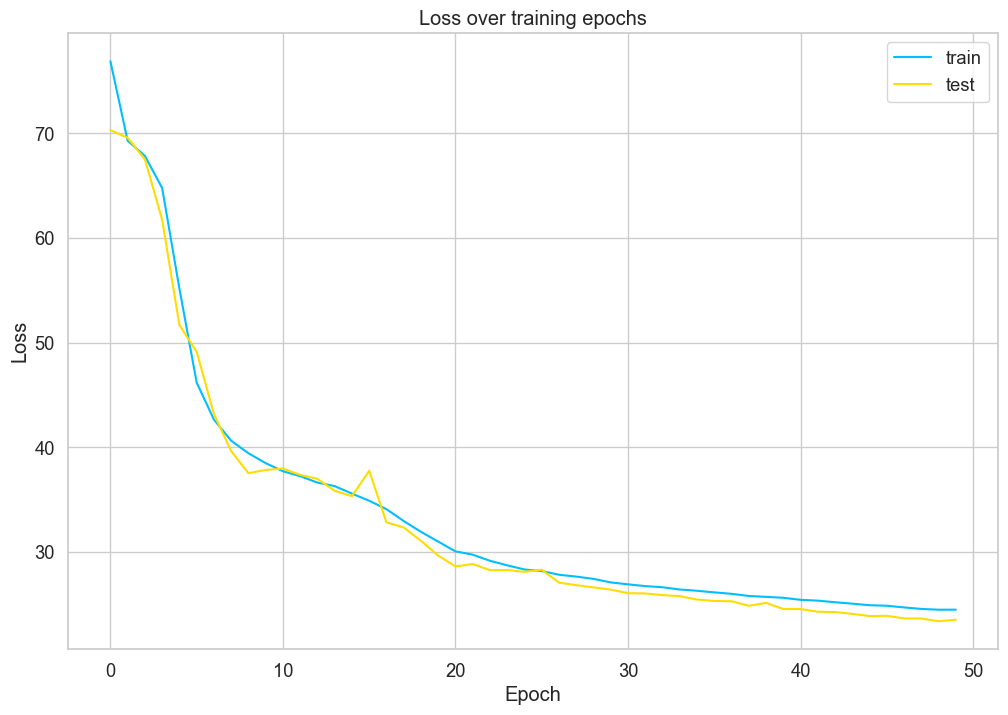

In [31]:
ax = plt.figure().gca()

ax.plot(history['train'])
ax.plot(history['val'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

C:\Users\ahjm5\AppData\Local\Temp\ipykernel_18248\3176797191.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(losses, bins=50, kde=True);


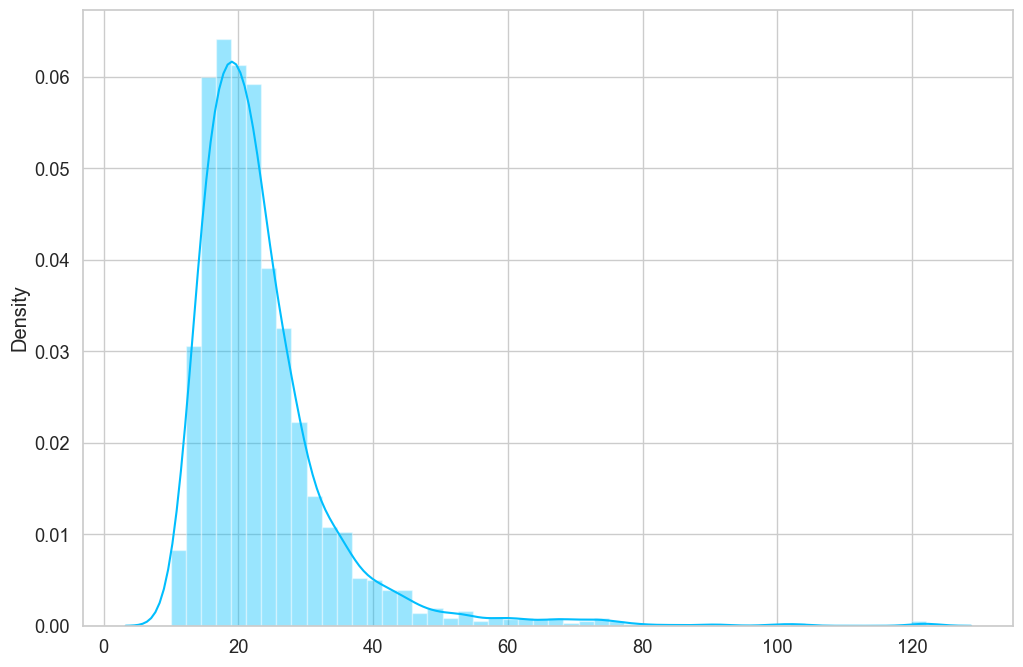

In [35]:
MODEL_PATH = 'model.pth'

torch.save(model, MODEL_PATH)

"""## Choosing a threshold

With our model at hand, we can have a look at the reconstruction error on the training set. Let's start by writing a helper function to get predictions from our model:
"""

def predict(model, dataset):
  predictions, losses = [], []
  criterion = nn.L1Loss(reduction='sum').to(device)
  with torch.no_grad():
    model = model.eval()
    for seq_true in dataset:
      seq_true = seq_true.to(device)
      seq_pred = model(seq_true)

      loss = criterion(seq_pred, seq_true)

      predictions.append(seq_pred.cpu().numpy().flatten())
      losses.append(loss.item())
  return predictions, losses

"""Our function goes through each example in the dataset and records the predictions and losses. Let's get the losses and have a look at them:"""

_, losses = predict(model, train_dataset)

sns.distplot(losses, bins=50, kde=True);

THRESHOLD = 45

C:\Users\ahjm5\AppData\Local\Temp\ipykernel_18248\2043387131.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_losses, bins=50, kde=True);
C:\Users\ahjm5\AppData\Local\Temp\ipykernel_18248\2043387131.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_losses, bins=50, kde=True);


Correct normal predictions: 139/145
Correct anomaly predictions: 141/145


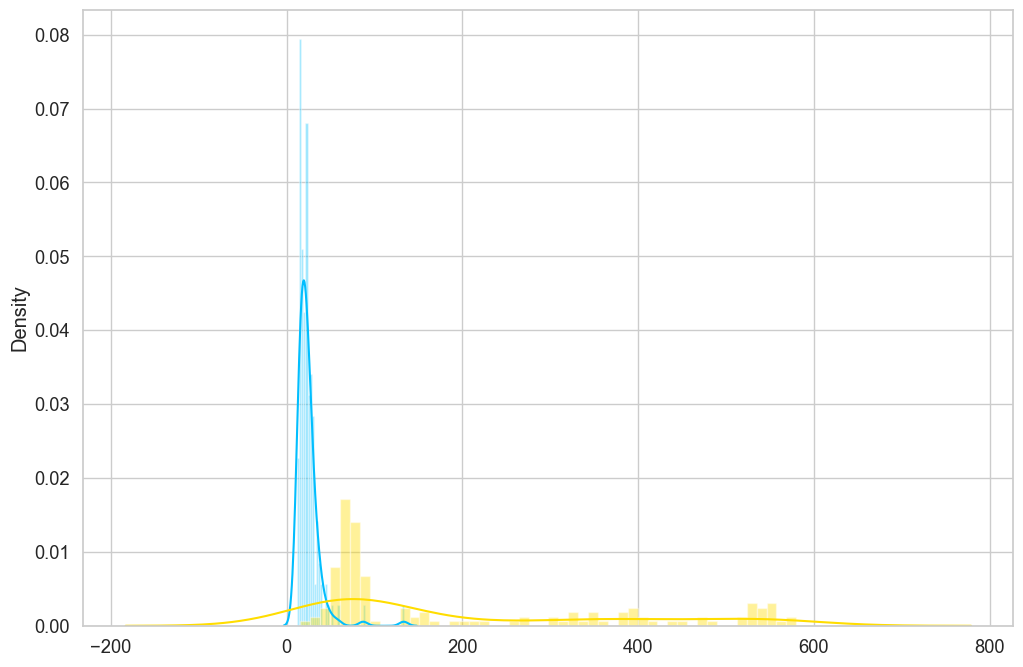

In [36]:
predictions, pred_losses = predict(model, test_normal_dataset)
sns.distplot(pred_losses, bins=50, kde=True);

"""We'll count the correct predictions:"""

correct = sum(l <= THRESHOLD for l in pred_losses)
print(f'Correct normal predictions: {correct}/{len(test_normal_dataset)}')

"""### Anomalies

We'll do the same with the anomaly examples, but their number is much higher. We'll get a subset that has the same size as the normal heartbeats:
"""

anomaly_dataset = test_anomaly_dataset[:len(test_normal_dataset)]
#anomaly_dataset = test_anomaly_dataset
"""Now we can take the predictions of our model for the subset of anomalies:"""

predictions, pred_losses = predict(model, anomaly_dataset)
sns.distplot(pred_losses, bins=50, kde=True);

"""Finally, we can count the number of examples above the threshold (considered as anomalies):"""

correct = sum(l > THRESHOLD for l in pred_losses)
print(f'Correct anomaly predictions: {correct}/{len(anomaly_dataset)}')

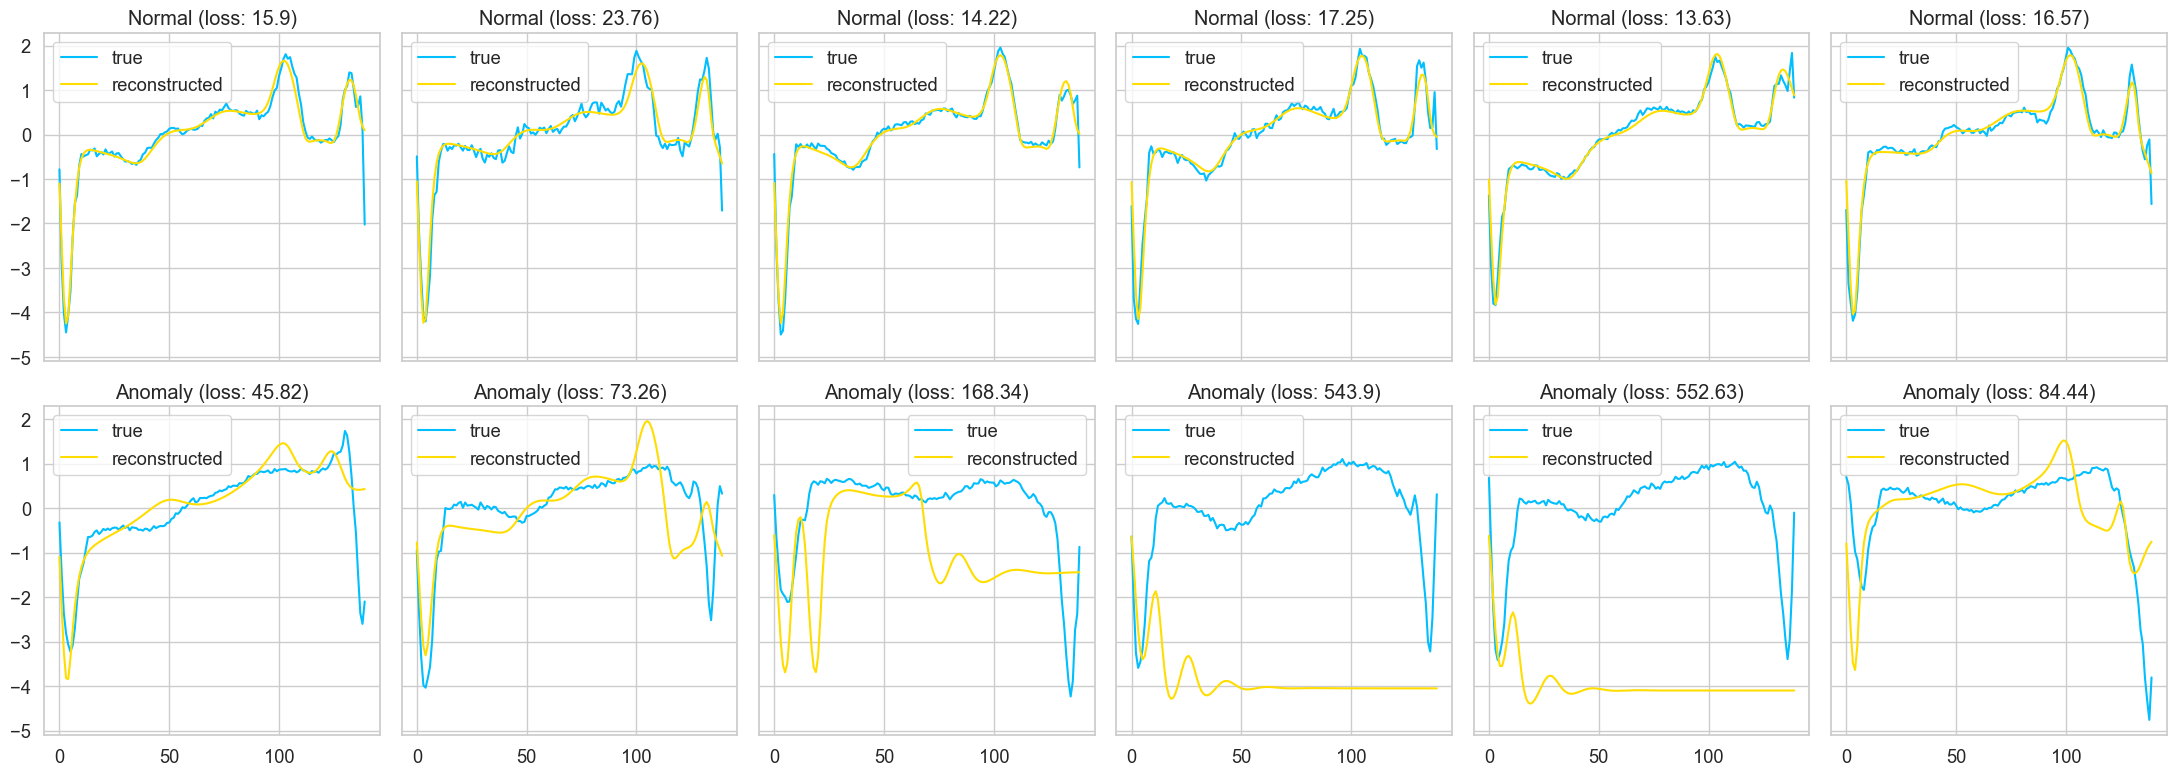

In [37]:
#### Looking at Examples

#We can overlay the real and reconstructed Time Series values to see how close they are. We'll do it for some normal and anomaly cases:

def plot_prediction(data, model, title, ax):
  predictions, pred_losses = predict(model, [data])

  ax.plot(data, label='true')
  ax.plot(predictions[0], label='reconstructed')
  ax.set_title(f'{title} (loss: {np.around(pred_losses[0], 2)})')
  ax.legend()

fig, axs = plt.subplots(
  nrows=2,
  ncols=6,
  sharey=True,
  sharex=True,
  figsize=(22, 8)
)

for i, data in enumerate(test_normal_dataset[:6]):
  plot_prediction(data, model, title='Normal', ax=axs[0, i])

for i, data in enumerate(test_anomaly_dataset[:6]):
  plot_prediction(data, model, title='Anomaly', ax=axs[1, i])

fig.tight_layout();

# CODE MODIFICATION 


##  Q1 (Part A and B)

In [40]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Define normal and abnormal classes
CLASS_NORMAL = "1"
normal_df = df[df["target"] == CLASS_NORMAL].drop(labels="target", axis=1)
anomaly_df = df[df["target"] != CLASS_NORMAL].drop(labels="target", axis=1)

# Train-validation-test split for normal data
train_df, val_df = train_test_split(normal_df, test_size=0.15, random_state=42)
val_df, test_df = train_test_split(val_df, test_size=0.33, random_state=42)

# Prepare data for LSTM Autoencoder
def create_dataset(df):
    sequences = df.astype(np.float32).to_numpy().tolist()
    dataset = [torch.tensor(s).unsqueeze(1).float() for s in sequences]
    n_seq, seq_len, n_features = torch.stack(dataset).shape
    return dataset, seq_len, n_features

train_dataset, seq_len, n_features = create_dataset(train_df)
val_dataset, _, _ = create_dataset(val_df)
test_normal_dataset, _, _ = create_dataset(test_df)
test_anomaly_dataset, _, _ = create_dataset(anomaly_df)

# Define LSTM Autoencoder classes
class Encoder(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim=64):
        super(Encoder, self).__init__()
        self.seq_len, self.n_features = seq_len, n_features
        self.embedding_dim, self.hidden_dim = embedding_dim, embedding_dim
        self.rnn1 = nn.LSTM(
            input_size=n_features, hidden_size=self.hidden_dim, num_layers=1, batch_first=True
        )
    def forward(self, x):
        x = x.reshape((1, self.seq_len, self.n_features))
        x, (hidden_n, _) = self.rnn1(x)
        return hidden_n.reshape((self.n_features, self.embedding_dim))

class Decoder(nn.Module):
    def __init__(self, seq_len, input_dim=64, n_features=1):
        super(Decoder, self).__init__()
        self.seq_len, self.input_dim = seq_len, input_dim
        self.hidden_dim, self.n_features = input_dim, n_features
        self.rnn1 = nn.LSTM(
            input_size=input_dim, hidden_size=input_dim, num_layers=1, batch_first=True
        )
        self.output_layer = nn.Linear(self.hidden_dim, n_features)
    def forward(self, x):
        x = x.repeat(self.seq_len, self.n_features)
        x = x.reshape((self.n_features, self.seq_len, self.input_dim))
        x, (hidden_n, cell_n) = self.rnn1(x)
        x = x.reshape((self.seq_len, self.hidden_dim))
        return self.output_layer(x)

class RecurrentAutoencoder(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim=64):
        super(RecurrentAutoencoder, self).__init__()
        self.encoder = Encoder(seq_len, n_features, embedding_dim).to(device)
        self.decoder = Decoder(seq_len, embedding_dim, n_features).to(device)
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiate model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RecurrentAutoencoder(seq_len, n_features, 8).to(device)

# Train the model
def train_model(model, train_dataset, val_dataset, n_epochs):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.L1Loss(reduction='sum').to(device)
    for epoch in range(1, n_epochs + 1):
        model.train()
        train_losses = []
        for seq_true in train_dataset:
            optimizer.zero_grad()
            seq_true = seq_true.to(device)
            seq_pred = model(seq_true)
            loss = criterion(seq_pred, seq_true)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
    return model.eval()

model = train_model(model, train_dataset, val_dataset, n_epochs=50)

# Predict function
def predict(model, dataset):
    losses = []
    criterion = nn.L1Loss(reduction='sum').to(device)
    with torch.no_grad():
        for seq_true in dataset:
            seq_true = seq_true.to(device)
            seq_pred = model(seq_true)
            loss = criterion(seq_pred, seq_true)
            losses.append(loss.item())
    return losses

   Threshold  Normal Recall  Anomaly Recall
0         15       0.137931        1.000000
1         25       0.689655        0.999039
2         35       0.903448        0.994234
3         45       0.951724        0.977415
4         55       0.979310        0.929841
5         65       0.986207        0.747237
6         75       0.993103        0.581451


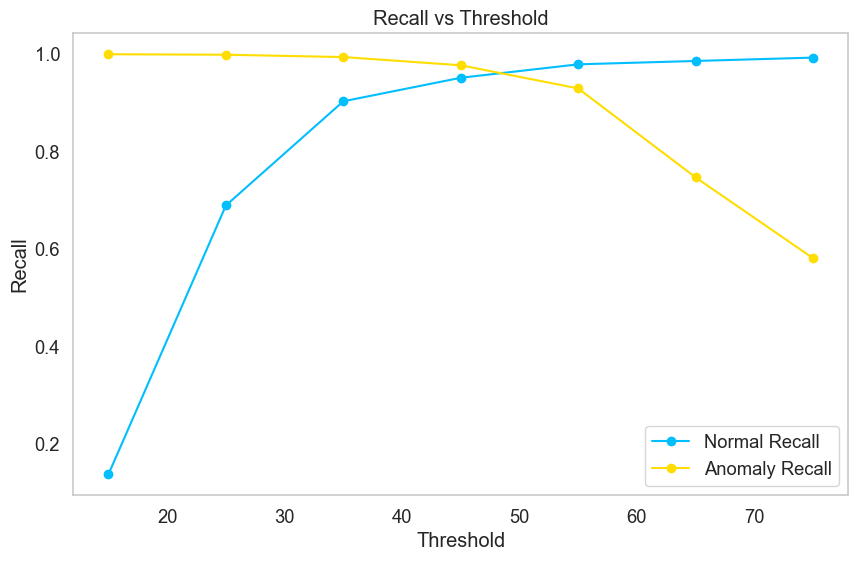

In [41]:
# Set thresholds
thresholds = range(15, 76, 10)

# Calculate predictions and losses for normal and anomaly datasets
normal_losses = predict(model, test_normal_dataset)
anomaly_losses = predict(model, test_anomaly_dataset)

# Initialize results storage
results = []

# Iterate through thresholds to compute recall values
for threshold in thresholds:
    normal_recall = sum(l <= threshold for l in normal_losses) / len(normal_losses)
    anomaly_recall = sum(l > threshold for l in anomaly_losses) / len(anomaly_losses)
    results.append({"Threshold": threshold, "Normal Recall": normal_recall, "Anomaly Recall": anomaly_recall})

# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(results)

# Display or save the results
print(results_df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results_df["Threshold"], results_df["Normal Recall"], label="Normal Recall", marker='o')
plt.plot(results_df["Threshold"], results_df["Anomaly Recall"], label="Anomaly Recall", marker='o')
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.title("Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()

## Q2 PART A


   Embedding Dim  Train Loss   Val Loss
0              2   65.584744  65.746523
1              4   47.555376  48.120243
2              6   47.424777  47.047580
3              8   28.899111  31.726997


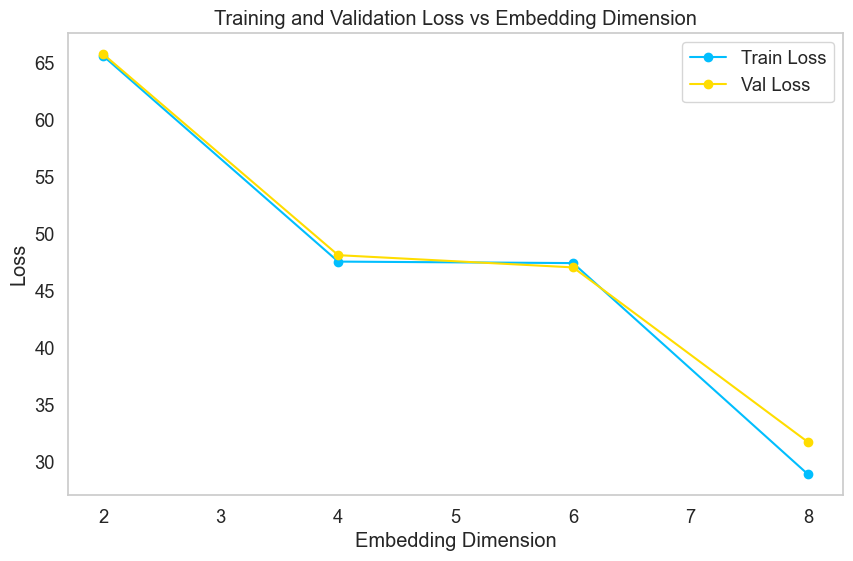

In [43]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Define normal and abnormal classes
CLASS_NORMAL = "1"
normal_df = df[df["target"] == CLASS_NORMAL].drop(labels="target", axis=1)
anomaly_df = df[df["target"] != CLASS_NORMAL].drop(labels="target", axis=1)

# Train-validation-test split for normal data
train_df, val_df = train_test_split(normal_df, test_size=0.15, random_state=42)
val_df, test_df = train_test_split(val_df, test_size=0.33, random_state=42)

# Prepare data for LSTM Autoencoder
def create_dataset(df):
    sequences = df.astype(np.float32).to_numpy().tolist()
    dataset = [torch.tensor(s).unsqueeze(1).float() for s in sequences]
    n_seq, seq_len, n_features = torch.stack(dataset).shape
    return dataset, seq_len, n_features

train_dataset, seq_len, n_features = create_dataset(train_df)
val_dataset, _, _ = create_dataset(val_df)

# Define LSTM Autoencoder classes
class Encoder(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim):
        super(Encoder, self).__init__()
        self.seq_len, self.n_features = seq_len, n_features
        self.embedding_dim, self.hidden_dim = embedding_dim, embedding_dim
        self.rnn1 = nn.LSTM(
            input_size=n_features, hidden_size=self.hidden_dim, num_layers=1, batch_first=True
        )
    def forward(self, x):
        x = x.reshape((1, self.seq_len, self.n_features))
        x, (hidden_n, _) = self.rnn1(x)
        return hidden_n.reshape((self.n_features, self.embedding_dim))

class Decoder(nn.Module):
    def __init__(self, seq_len, input_dim, n_features=1):
        super(Decoder, self).__init__()
        self.seq_len, self.input_dim = seq_len, input_dim
        self.hidden_dim, self.n_features = input_dim, n_features
        self.rnn1 = nn.LSTM(
            input_size=input_dim, hidden_size=input_dim, num_layers=1, batch_first=True
        )
        self.output_layer = nn.Linear(self.hidden_dim, n_features)
    def forward(self, x):
        x = x.repeat(self.seq_len, self.n_features)
        x = x.reshape((self.n_features, self.seq_len, self.input_dim))
        x, (hidden_n, cell_n) = self.rnn1(x)
        x = x.reshape((self.seq_len, self.hidden_dim))
        return self.output_layer(x)

class RecurrentAutoencoder(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim):
        super(RecurrentAutoencoder, self).__init__()
        self.encoder = Encoder(seq_len, n_features, embedding_dim).to(device)
        self.decoder = Decoder(seq_len, embedding_dim, n_features).to(device)
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Function to train the model
def train_model(model, train_dataset, val_dataset, n_epochs):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.L1Loss(reduction='sum').to(device)
    train_losses, val_losses = [], []
    for epoch in range(1, n_epochs + 1):
        model.train()
        epoch_train_losses = []
        for seq_true in train_dataset:
            optimizer.zero_grad()
            seq_true = seq_true.to(device)
            seq_pred = model(seq_true)
            loss = criterion(seq_pred, seq_true)
            loss.backward()
            optimizer.step()
            epoch_train_losses.append(loss.item())
        train_loss = np.mean(epoch_train_losses)
        train_losses.append(train_loss)

        model.eval()
        epoch_val_losses = []
        with torch.no_grad():
            for seq_true in val_dataset:
                seq_true = seq_true.to(device)
                seq_pred = model(seq_true)
                loss = criterion(seq_pred, seq_true)
                epoch_val_losses.append(loss.item())
        val_loss = np.mean(epoch_val_losses)
        val_losses.append(val_loss)

    return train_losses[-1], val_losses[-1]

# Vary embedding dimensions and collect results
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embedding_dims = range(2, 9, 2)
results = []

for embedding_dim in embedding_dims:
    model = RecurrentAutoencoder(seq_len, n_features, embedding_dim).to(device)
    train_loss, val_loss = train_model(model, train_dataset, val_dataset, n_epochs=25)
    results.append({"Embedding Dim": embedding_dim, "Train Loss": train_loss, "Val Loss": val_loss})

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(results_df["Embedding Dim"], results_df["Train Loss"], label="Train Loss", marker='o')
plt.plot(results_df["Embedding Dim"], results_df["Val Loss"], label="Val Loss", marker='o')
plt.xlabel("Embedding Dimension")
plt.ylabel("Loss")
plt.title("Training and Validation Loss vs Embedding Dimension")
plt.legend()
plt.grid()
plt.show()

## Q2 PART C

   Embedding Dim  Normal Recall  Anomaly Recall
0              2       0.006897        0.999039
1              4       0.331034        0.995195
2              6       0.841379        0.990389
3              8       0.951724        0.991350


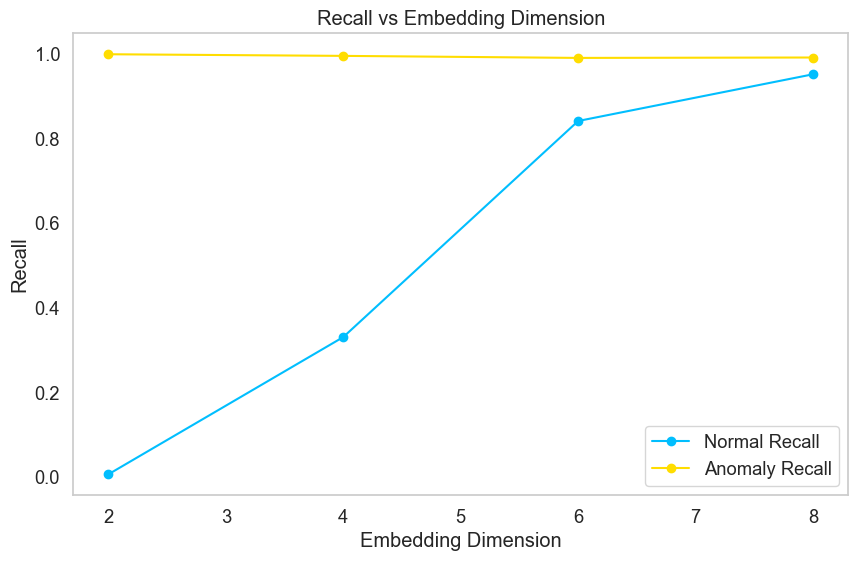

In [44]:
# Define a function to compute recall
def compute_recall(model, test_normal_dataset, test_anomaly_dataset, threshold):
    normal_losses = predict(model, test_normal_dataset)
    anomaly_losses = predict(model, test_anomaly_dataset)

    normal_recall = sum(l <= threshold for l in normal_losses) / len(normal_losses)
    anomaly_recall = sum(l > threshold for l in anomaly_losses) / len(anomaly_losses)

    return normal_recall, anomaly_recall

# Initialize results storage
threshold = 45
recall_results = []

# Compute recall for each embedding dimension
for embedding_dim in embedding_dims:
    model = RecurrentAutoencoder(seq_len, n_features, embedding_dim).to(device)
    train_model(model, train_dataset, val_dataset, n_epochs=25)  # Train the model for 25 epochs
    
    normal_recall, anomaly_recall = compute_recall(
        model, test_normal_dataset, test_anomaly_dataset, threshold
    )
    recall_results.append({
        "Embedding Dim": embedding_dim,
        "Normal Recall": normal_recall,
        "Anomaly Recall": anomaly_recall
    })

# Convert results to DataFrame and display
recall_results_df = pd.DataFrame(recall_results)
print(recall_results_df)

# Plot recall values
plt.figure(figsize=(10, 6))
plt.plot(recall_results_df["Embedding Dim"], recall_results_df["Normal Recall"], label="Normal Recall", marker='o')
plt.plot(recall_results_df["Embedding Dim"], recall_results_df["Anomaly Recall"], label="Anomaly Recall", marker='o')
plt.xlabel("Embedding Dimension")
plt.ylabel("Recall")
plt.title("Recall vs Embedding Dimension")
plt.legend()
plt.grid()
plt.show()